## Lab | Data cleaning and wrangling

1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables.
4. Encode the categorical variables
5. Transform the time variables (day, week and month) to integers.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

from: https://github.com/student-IH-labs-and-stuff/lab-data-cleaning-and-wrangling/blob/master/readme.md

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

### EDA

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

#quite a lot of columns/features

(9134, 24)

In [5]:
data.info()

#no nulls/NaNs, thats good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [41]:
for c in data.columns.tolist():         # know the number of unique values for each column
    print(c, len(data[c].unique()))

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [6]:
data.describe()

#we already see that the max of the num values differ quite a lot
#e.g. max customer lifetime value VS month since last claim

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
data.dtypes

#they look like they make sense so far

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
list(data.select_dtypes(include=['number']))

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

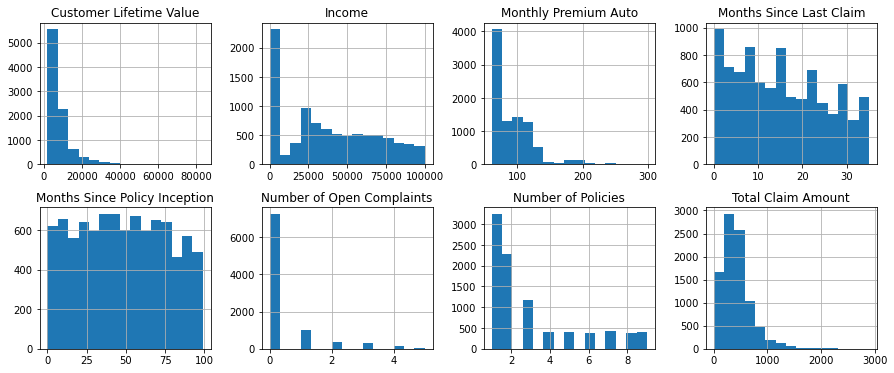

In [9]:
#get an overview of all num data via histograms
data_num = data.select_dtypes(include=['number'])
data_num.hist(bins=15, figsize=(15, 6), layout=(2, 4));

#Customer Lifetime Value' - heavily skewd right
#'Income' -> maybe outlier?
#'Monthly Premium Auto' -> drop between 140-170
#'Months Since Last Claim'-> weird spikes?
#'Months Since Policy Inception' -> uniform
#'Number of Open Complaints' -> pearson?
#'Number of Policies' -> pearson?
#'Total Claim Amount -> could be normalizes without the outliers?

<AxesSubplot:xlabel='Customer Lifetime Value'>

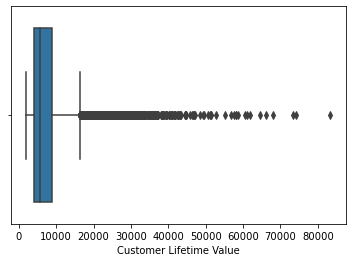

In [12]:
sns.boxplot(x=data['Customer Lifetime Value'])

#367 outliers between 16.000 and 80.000

In [14]:
#getting the real number of outliers (copied form Flos solution)

q1=np.percentile(data['Customer Lifetime Value'], 25)   # percentile 25
q3=np.percentile(data['Customer Lifetime Value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [15]:
# how many rows would be outliers in that sense (below the threshold)?

len(data[data['Customer Lifetime Value'] < lower])

0

In [17]:
# how many rows would be outliers in that sense (above the threshold)?
len(data[data['Customer Lifetime Value'] > upper])

367

In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_num))
print(z)

#can only do this when splitting df into num

[[0.76287773 0.61282744 0.70392465 ... 0.42224956 0.82264788 0.16963969]
 [0.14924546 1.23961684 0.02269103 ... 0.42224956 2.10615996 2.400737  ]
 [0.71063622 0.36570978 0.42959581 ... 0.42224956 0.40424676 0.45573376]
 ...
 [0.02313483 1.23961684 0.23889062 ... 2.87324529 0.40424676 1.22793667]
 [0.06993547 0.51735647 0.08082028 ... 0.42224956 0.01415436 0.88511256]
 [0.78495478 1.23961684 0.47140763 ... 0.42224956 0.82264788 0.22200449]]


In [19]:
threshold = 3
print(np.where(z > 3))

#The first array contains the list of row numbers and second array respective column numbers, 
#which mean z[31][2] have a Z-score higher than 3.

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [20]:
print(z[31][2])

4.178932721080021


Frequency analysis of column:  Customer


KeyboardInterrupt: 

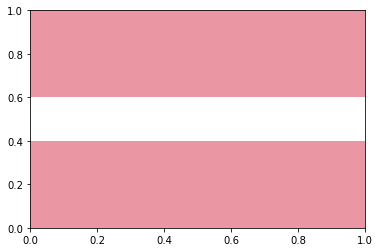

In [21]:
#get an overview of all cat data frequency
data_cat = list(data.select_dtypes(include=['object']).columns)

for col in data_cat:
    print("Frequency analysis of column: ",col)
    my_data = data[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print
    
#maybe a little much columns for this view

## Data cleaning

- standardize headers lower case
- remove outliers


#### standardize headers lower case

In [23]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### remove outliers

An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean. Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier. Outlier calculations are performed separately for each column.

In [24]:
data_c = data[(z < 3).all(axis=1)]
data_c.shape

(8470, 24)

In [25]:
data.shape

(9134, 24)

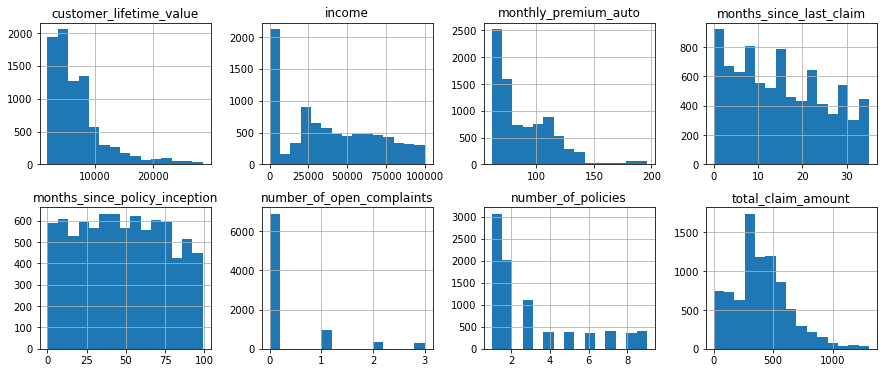

In [26]:
data_c.hist(bins=15, figsize=(15, 6), layout=(2, 4));

## Data wrangling

- create copy of df for wrangling
- normalise continous varaibles
- encode cat v


#### create copy of df for wrangling

In [27]:
#create copy of df for wrangling

data_w = data_c

#### split again in num and cat

In [28]:
data_wn = data_w.select_dtypes(include=['number'])

#num

In [29]:
data_wc = data_w.select_dtypes(include=['object'])

#cat

#### numerical scaling  -normalise continous varaibles

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [31]:
transformer = Normalizer().fit(data_wn)
data_wn_normalized = transformer.transform(data_wn)
data_wn_normalized = pd.DataFrame(data_wn_normalized)
data_wn_normalized

,0,1,2,3,4,5,6,7
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
8465,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
8466,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
8467,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
8468,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


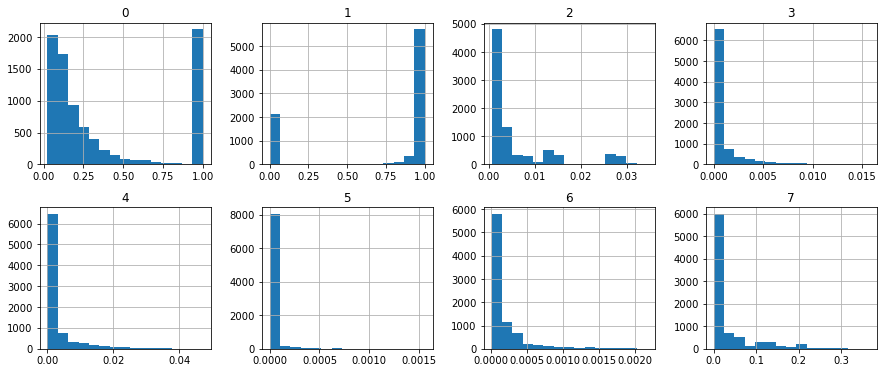

In [32]:
data_wn_normalized.hist(bins=15, figsize=(15, 6), layout=(2, 4));

#### Encode the categorical variables

In [33]:
data_wc

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [34]:
data_wc.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [35]:
data_wc = pd.get_dummies(data_wc, columns =['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'], drop_first=True)
data_wc

,effective_to_date,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2/24/11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1/31/11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2/19/11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1/20/11,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2/3/11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,2/12/11,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,2/6/11,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,2/3/11,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Transform the time variables (day, week and month) to integers.

In [42]:
data_wc['effective_to_date'].dtype

dtype('O')

In [43]:
# convert it to datetime
data_wc['effective_to_date']=pd.to_datetime(data_wc['effective_to_date'])
data_wc

,effective_to_date,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2011-02-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2011-01-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011-02-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2011-01-20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2011-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2011-02-10,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,2011-02-12,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,2011-02-06,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,2011-02-03,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
data_wc['effective_to_date'].dtype

dtype('<M8[ns]')

In [45]:
data_wc['effective_to_date'].min()

Timestamp('2011-01-01 00:00:00')

In [46]:
# we will change the effective to date column to ordinal
data_wc['effective_to_date']= data_wc['effective_to_date'].apply(lambda x: x.toordinal())
data_wc

,effective_to_date,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,734192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,734168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,734187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,734157,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,734171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,734178,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,734180,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,734174,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,734171,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
data_wc['effective_to_date'].dtype

dtype('int64')

#### merging the num and cat together

In [48]:
len(data_wn_normalized), len(data_wc)

(8470, 8470)

In [49]:
X = np.concatenate((data_wn_normalized, data_wc), axis=1)
X

array([[0.04904798, 0.99877216, 0.00122464, ..., 1.        , 1.        ,
        0.        ],
       [0.98700641, 0.        , 0.01329295, ..., 0.        , 1.        ,
        0.        ],
       [0.25547779, 0.96674697, 0.00214097, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.9952772 , 0.        , 0.01036253, ..., 0.        , 1.        ,
        0.        ],
       [0.32424724, 0.94549313, 0.00413688, ..., 0.        , 0.        ,
        0.        ],
       [0.98913809, 0.        , 0.02916095, ..., 1.        , 1.        ,
        0.        ]])

#### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [39]:
X.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'